In [ ]:
# Instalar librerías adicionales si es necesario (ejecutar primero)
!pip install seaborn plotly

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
print("GPU:", tf.config.list_physical_devices('GPU'))
print("Entorno para Deep Learning listo")

GPU: []
Entorno para Deep Learning listo


# Introducción a Deep Learning
Red neuronal simple para clasificación en Iris.

In [ ]:
# Preparar datos (Iris one-hot para multi-clase)
iris = load_iris()
X = iris.data
y = iris.target
y_cat = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Datos preparados para red neuronal")

Datos preparados para red neuronal


## Preparación: One-Hot Encoding
Convertimos labels a vectores binarios para salida softmax.

In [ ]:
# Modelo: Red Neuronal Simple
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Capa oculta
    Dense(3, activation='softmax')  # Capa salida
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

None


## Arquitectura del Modelo
- Input: 4 features (Iris).
- Oculta: 10 neuronas ReLU.
- Salida: 3 clases softmax.

In [ ]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluación
loss, acc = model.evaluate(X_test, y_test)
print("Precisión final:", acc)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.0755 - loss: 1.5632 - val_accuracy: 0.0417 - val_loss: 1.3710
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0599 - loss: 1.5440 - val_accuracy: 0.0417 - val_loss: 1.3503
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0560 - loss: 1.4844 - val_accuracy: 0.1250 - val_loss: 1.3299
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0729 - loss: 1.4422 - val_accuracy: 0.1667 - val_loss: 1.3099
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0768 - loss: 1.4383 - val_accuracy: 0.1667 - val_loss: 1.2905
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0703 - loss: 1.4020 - val_accuracy: 0.1667 - val_loss: 1.2715
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0703 - loss: 1.3947 - val_accuracy: 0.1667 - val_loss: 1.2533
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0938 - loss: 1.3488 - val_accuracy: 0.1667 - val_loss: 1.2359

## Entrenamiento
50 epochs: Observa pérdida decreciente y precisión creciente.

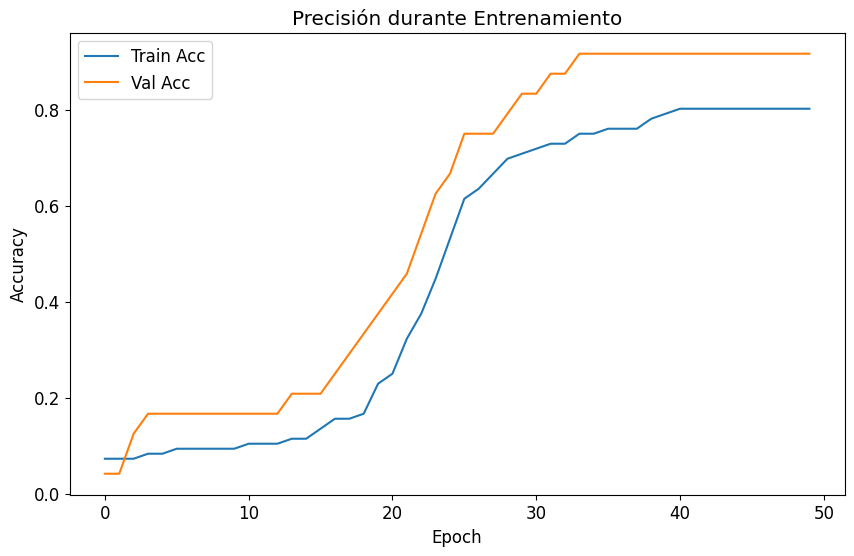

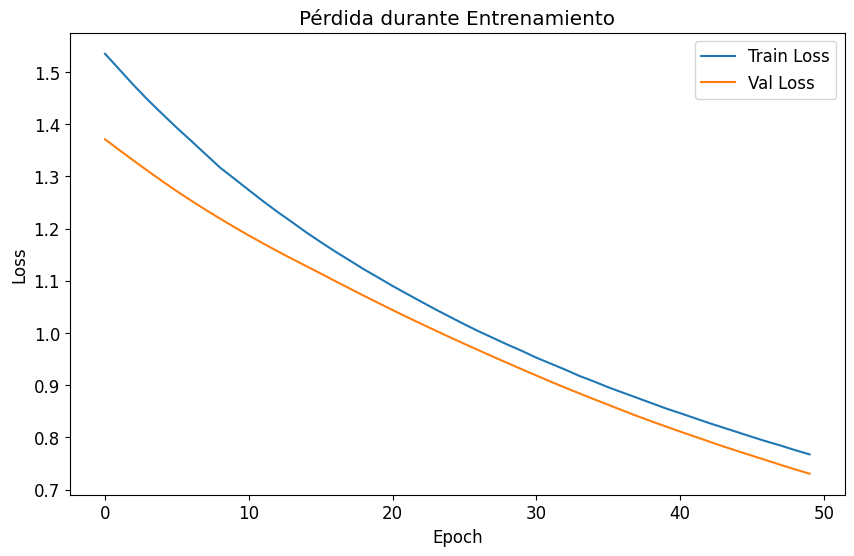

In [ ]:
# Visualización del proceso
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Precisión durante Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida durante Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualización de Entrenamiento
Curvas: Train vs Val. Si Val diverge, hay overfitting.
## Conclusión
Redes neuronales escalan bien con datos grandes; compara con sklearn (similar precisión en Iris).

In [ ]:
from getpass import getpass
from google.colab import drive
from google.colab import auth
import subprocess  # Ayudante para sustituir el token en Git

# Pide el token de forma segura (pégalo aquí – no se ve)
token = getpass("Pega tu token de GitHub aquí (no se verá): ")

# Conecta Drive y auth
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user()

!git config --global user.email "boris.tigre@uees.edu.ec"
!git config --global user.name "Boris Tigre"

# Limpieza y clon
!rm -rf /content/UEES-IA-Semana1-TigreBoris
!git clone https://github.com/boristigre-uees/UEES-IA-Semana1-TigreBoris.git /content/UEES-IA-Semana1-TigreBoris
%cd /content/UEES-IA-Semana1-TigreBoris

# Carpetas
!mkdir -p ./02_Laboratorio/notebooks/

# Copia desde Drive
!cp "/content/drive/MyDrive/Colab Notebooks/04_Deep_Learning_Intro.ipynb" ./02_Laboratorio/notebooks/

# Commit
!git add .
!git commit -m "Añadir notebook de fundamentos"

# TRUCO: Sustituye el token correctamente en el comando de Git (sin "{token}")
subprocess.run(["git", "remote", "set-url", "origin", f"https://{token}@github.com/boristigre-uees/UEES-IA-Semana1-TigreBoris.git"])

# Push (ahora con el token sustituido, no falla)
!git push origin main

print("¡Subido! Ve a github.com/boristigre-uees/UEES-IA-Semana1-TigreBoris para ver el notebook.")

Pega tu token de GitHub aquí (no se verá): ··········
